In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,01-01-1995,7.889470e+11,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,17,06-04-2017 08:36,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,01-01-1995,7.889470e+11,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,21,06-04-2017 08:32,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,08-01-1995,7.895520e+11,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,22,06-04-2017 09:20,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,15-01-1995,7.901570e+11,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,7,06-04-2017 09:15,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,15-01-1995,7.901570e+11,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,25,06-04-2017 08:57,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


In [ ]:
df.shape

(4687, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   float64
 13  Rel

In [ ]:
df = df.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date',
                        'Epoch Date Close Approach', 'Orbit Determination Date'] , axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True


# One Hot Encoding of Hazardous Column

In [ ]:
hazardous_labels = pd.get_dummies(df['Hazardous'])
hazardous_labels

,False,True
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4682,1,0
4683,1,0
4684,1,0
4685,1,0


In [ ]:
df = pd.concat([df, hazardous_labels], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,False,True
0,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False,1,0
4,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True,0,1


In [ ]:
df = df.drop(['Hazardous'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,False,True
0,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,6.115834,22017.00380,13680.50994,0.419483,163.178711,62753692.0,38993336.0,Earth,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,65210.34609,40519.17311,0.383014,148.992630,57298148.0,35603420.0,Earth,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,27326.56018,16979.66180,0.050956,19.821890,7622911.5,4736657.5,Earth,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173875,40225.94819,24994.83986,0.285322,110.990387,42683616.0,26522368.0,Earth,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,1,0
4,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,9.840831,35426.99179,22012.95498,0.407832,158.646713,61010824.0,37910368.0,Earth,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

# Observing Unique Values in Orbiting Body and Equinox

In [ ]:
df['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

In [ ]:
df['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

# Only single unique value, so both can be dropped

In [ ]:
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)

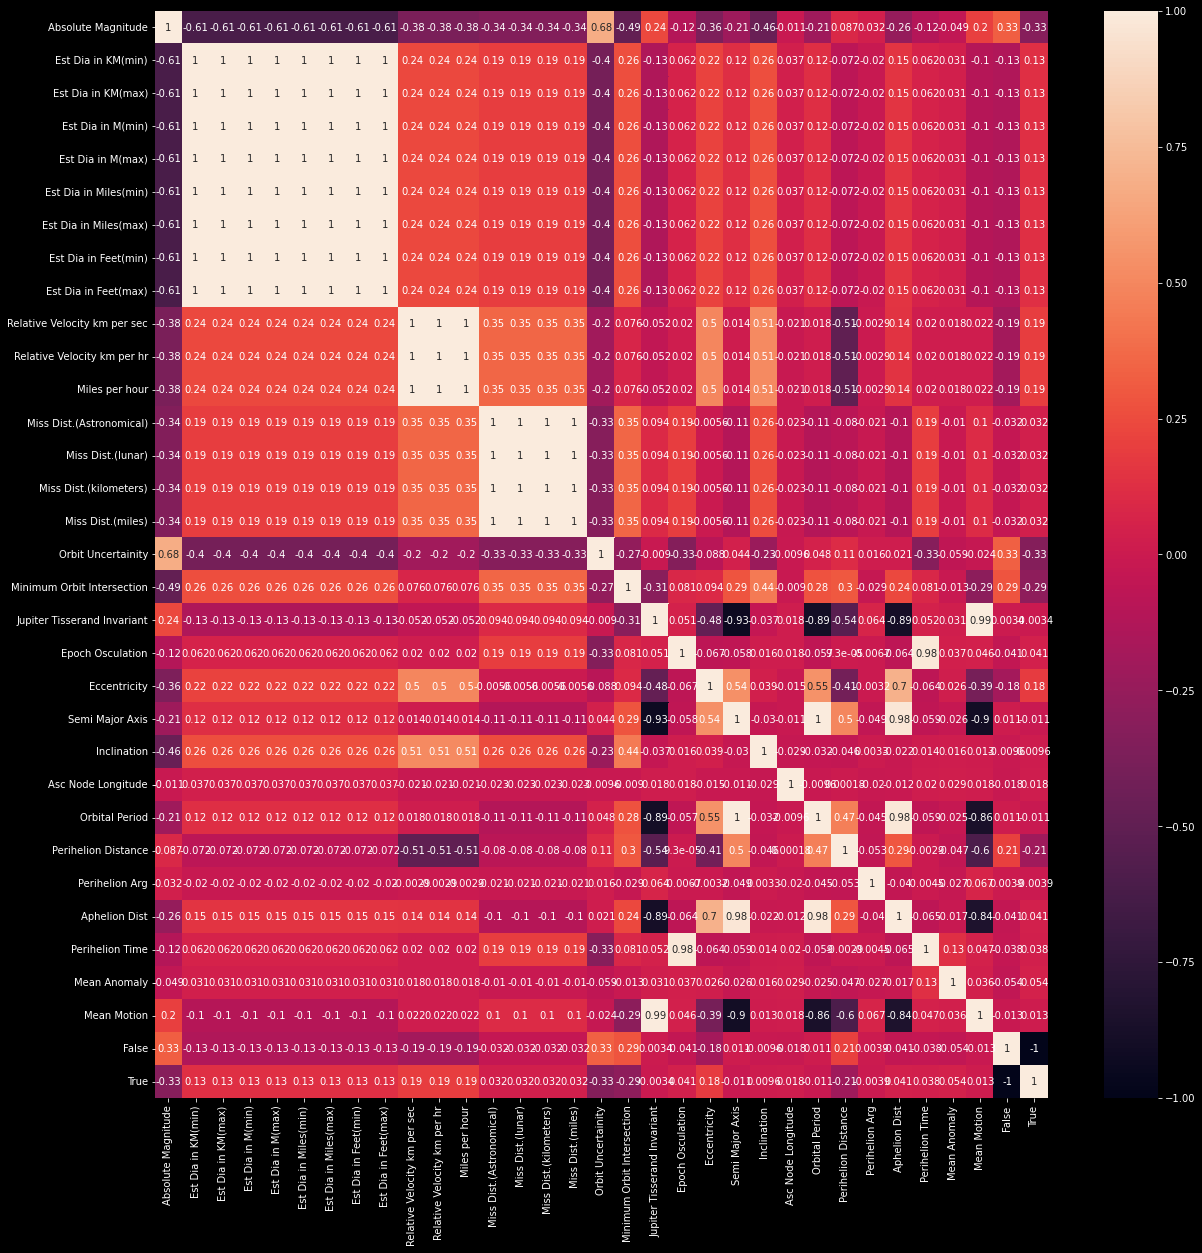

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

# Many Columns are there which are having correlation 1 because they are identical columns with a different unit. So, can be dropped.

In [ ]:
df = df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,0,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,1,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,0,1
3,27.4,0.008801,11.173875,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,1,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,0,1


# Final Heatmap

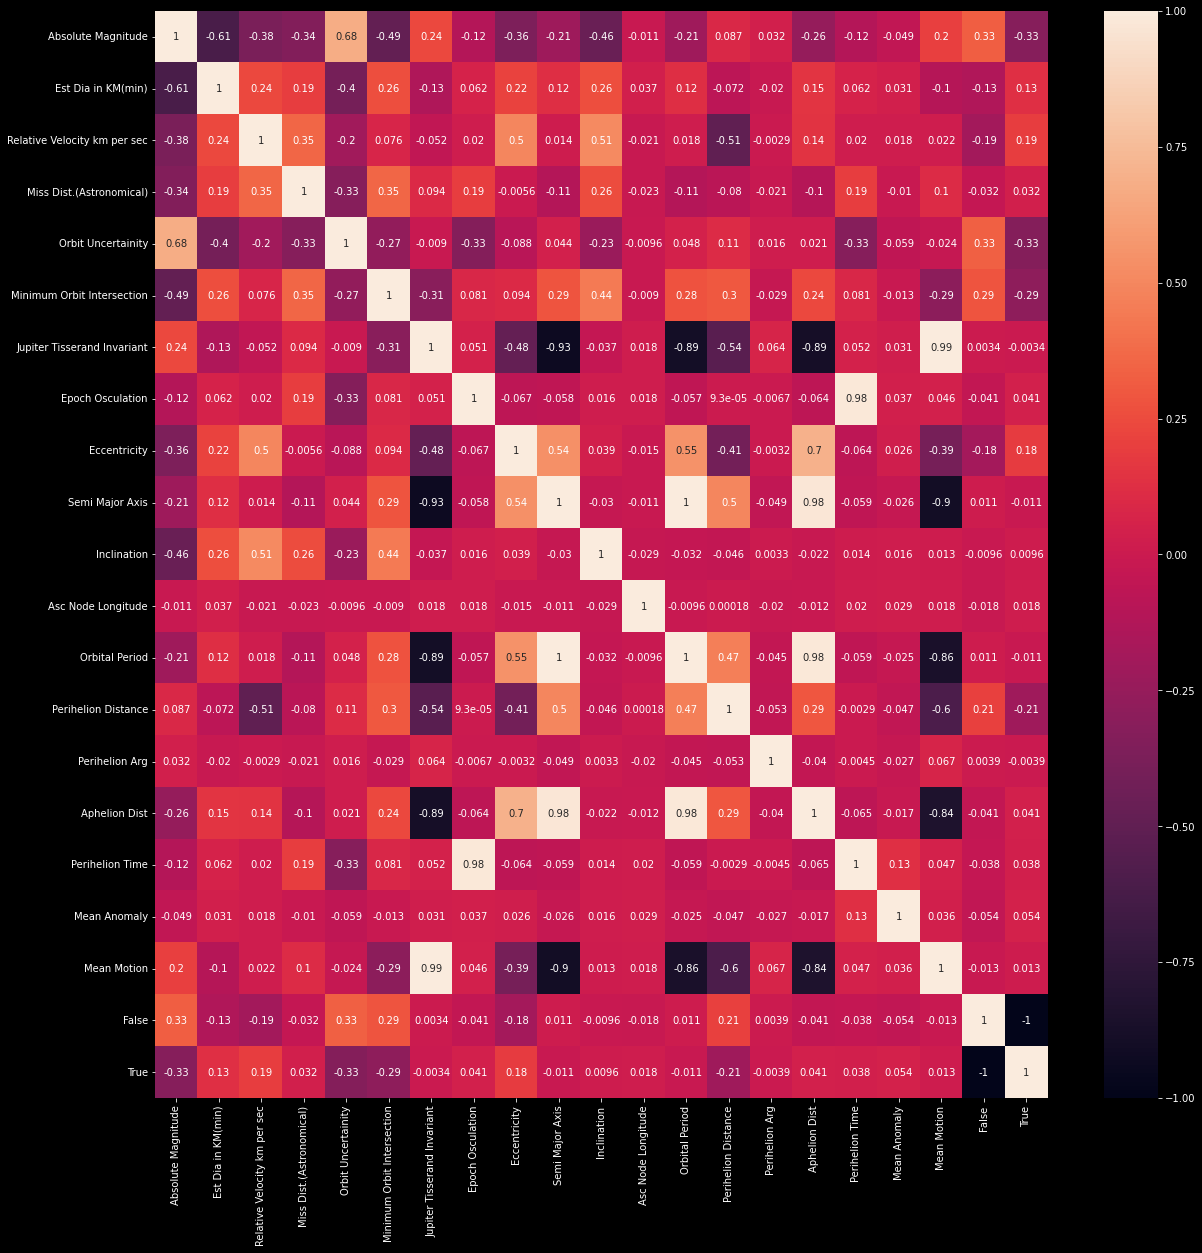

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

# Drop the False Column, True is enough for classification

In [ ]:
df.drop([False], axis = 1, inplace = True)

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,27.4,0.008801,11.173875,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


In [ ]:
df.describe()


,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,13.970811,0.256778,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,7.293223,0.145798,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.335504,0.000178,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,8.432865,0.133420,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,12.917889,0.265029,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,18.077649,0.384154,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,44.633747,0.499884,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


# Model Building

In [ ]:
x = df.drop([True], axis = 1)
y = df[True].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 , test_size = 0.3)

# XGBoost Classifier
# XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) ... A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.
# The XGBoost library provides a built-in function to plot features ordered by their importance.

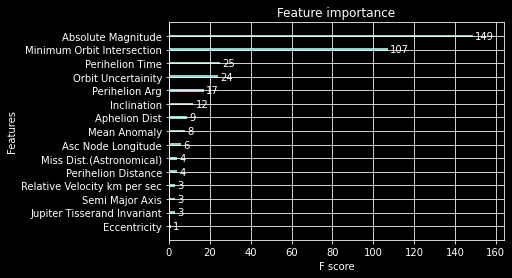

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)
plot_importance(xbg_model)
pyplot.show()

# Final Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

predictions = xbg_model.predict(x_test)
acc = accuracy_score(y_test, predictions)
print(str(np.round(acc*100, 2))+'%')
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


99.5%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       0.99      0.98      0.98       226

    accuracy                           1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407

[[1179    2]
 [   5  221]]
